In [1]:
%matplotlib widget
import matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [3]:
df = pd.read_csv("data/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")

# setting date as index
len(df)

165085

In [4]:
# converting the date to datetime
df["Date"] = pd.to_datetime(df["Date"])

# accessing the values of date via array attribute of the resulting series
    ## creating a mask via month AND day to filter out leap years, AND filter out 2015
mask = (df["Date"].array.month == 2) & (df["Date"].array.day == 29)

    #reversing boolean values of the mask to filter out leap years
df = df[~mask]

# sorting by date NEWEST TO OLDEST
df.sort_values("Date", ascending = False, inplace=True)
df

ID       Date Element  Data_Value
25720  USC00201502 2015-12-31    TMAX          -6
10639  USC00205050 2015-12-31    TMAX           0
21078  USC00205822 2015-12-31    TMIN           0
25717  USC00201502 2015-12-31    TMIN         -22
34004  USW00004848 2015-12-31    TMIN         -10
...            ...        ...     ...         ...
41309  USC00208080 2005-01-01    TMIN         -39
49827  USC00200228 2005-01-01    TMIN         -39
1860   USC00202308 2005-01-01    TMAX         150
55102  USC00200032 2005-01-01    TMAX          67
18049  USW00014853 2005-01-01    TMAX          56

[165002 rows x 4 columns]

In [5]:
# creating relevant summary table via pivot table
summary_table = df.pivot_table(values="Data_Value", index="Date", aggfunc=[np.max, np.min])

# transforming tenths of degrees to FULL DEGREES on resulting columns
summary_table = summary_table.apply(lambda x: x/10, axis=1)

# creating table for line plot
result_table = summary_table[summary_table.index.year != 2015]

# finding higuest maxs for label creation
max_higs = result_table["amax"][result_table["amax"] == 40.6].dropna()
#finding lowest lows for label creation
min_lows = result_table["amin"][result_table["amin"] == (-30.6)].dropna()

# creating table for scatters
    ## finding max value for 2005-2014 period
    ### This results in a series, which is then converted to a np.array and then its values are extracted
max_val = np.max(result_table["amax"]).values.item()
    ## finding max value for 2005-2014 period
    ### This results in a series, which is then converted to a np.array and then its values are extracted
min_val = np.min(result_table["amin"]).values.item()
    ## fixind column levels for easier processing...
summary_table.columns = summary_table.columns.droplevel(1)
    ## obtaining days that were higuer OR lower than than max or min
scat_mask_highs = summary_table["amax"] > max_val
scat_mask_lows = summary_table["amin"] < min_val
    ## applying mask to obtain relevant points
scat_max_table = summary_table[scat_mask_highs]
scat_min_table = summary_table[scat_mask_lows]
max_higs

Data_Value
Date                  
2011-07-21        40.6
2012-06-28        40.6
2012-07-17        40.6

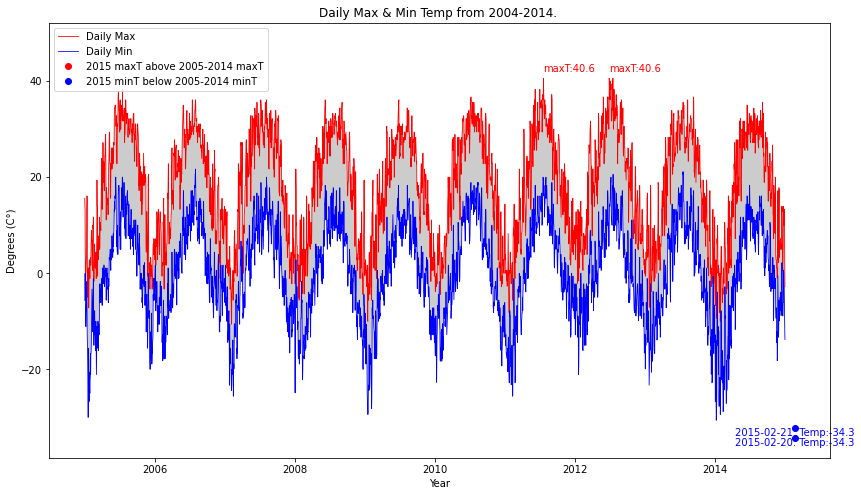

In [8]:
%matplotlib inline
#resizing figure
    # (WIDHT, HEIGHT)
plt.figure(figsize=(14,8))

# calling .plot twice to get the series
    ## necessary to add the label directly into the graph call
    # addding each line/plot individually
plt.plot(result_table.index, result_table["amax"]["Data_Value"], 'r-', linewidth=0.8, label="Daily Max") 
plt.plot(result_table.index, result_table["amin"]["Data_Value"], 'b-', linewidth=0.8, label="Daily Min")
plt.plot(scat_max_table.index, scat_max_table["amin"], 'ro', label="2015 maxT above 2005-2014 maxT")
plt.plot(scat_min_table.index, scat_min_table["amin"], 'bo', label="2015 minT below 2005-2014 minT")

    ## adding data labels to relevant points
    ## plt.text(<x>, <y>, <text>)
    ###  addding a slight offset to the Y (+3)
for i in range(len(max_higs)-1):
    plt.text(max_higs.index[i], max_higs.iloc[i]+3, f"maxT:{max_val}", color='red', verticalalignment='top', horizontalalignment='left')
    
    ## getting date from timestamp via timestamp.strftime('%Y-%m-%d')
for ind in range(len(scat_min_table)):
    plt.text(scat_min_table.index[ind], scat_min_table["amin"].iloc[ind], f"{scat_min_table.index[ind].strftime('%Y-%m-%d')}. Temp:{scat_min_table['amin'].iloc[0]}", color="blue", verticalalignment='top', horizontalalignment='center')
    
# setting appropiate axis labels and legend and title
plt.gca().xaxis.set_label_text("Year")
plt.gca().yaxis.set_label_text("Degrees (C°)")

#setting legend to upper left
plt.legend(loc=2)

plt.title("Daily Max & Min Temp from 2004-2014. ")

# setting Y axis to be wider to make the view easier
plt.gca().yaxis.set_data_interval(-34.0, 48.0)

# shading area between
plt.fill_between(result_table.index, result_table["amin"]["Data_Value"], result_table["amax"]["Data_Value"], facecolor='grey', alpha= 0.4)

plt.savefig("Week2-Assigntment.png")

plt.show()